{'110 000': 125, '000 000': 137, '111 000': 129, '101 000': 127, '001 000': 126, '011 000': 126, '010 000': 127, '100 000': 127}


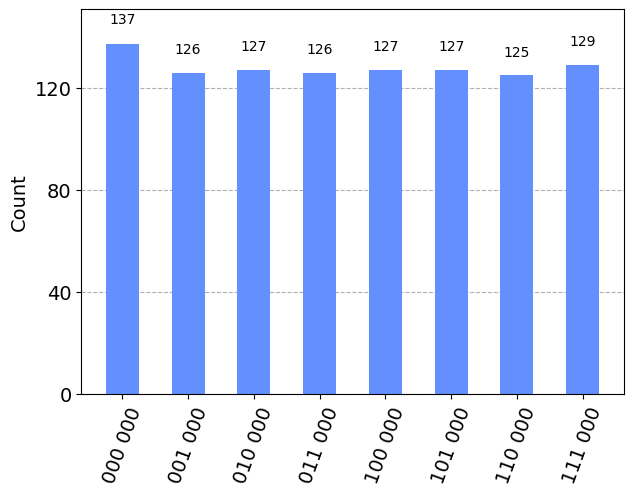

In [18]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Define number of qubits
n = 3
qc = QuantumCircuit(n, 3)
qc.x(1)  # Set qubit 1 to 1, creating |010>

# Apply QFT gates
for qubit in range(n):
    qc.h(qubit)
    for other_qubit in range(qubit + 1, n):
        angle = 2 * 3.14159 / (2 ** (other_qubit - qubit + 1))
        qc.cp(angle, other_qubit, qubit)

# Swap the qubits to reverse order
for qubit in range(n // 2):
    qc.swap(qubit, n - qubit - 1)

# Draw the circuit
qc.draw('mpl')


{'101 000': 135, '110 000': 110, '010 000': 134, '000 000': 135, '001 000': 136, '100 000': 118, '111 000': 153, '011 000': 103}


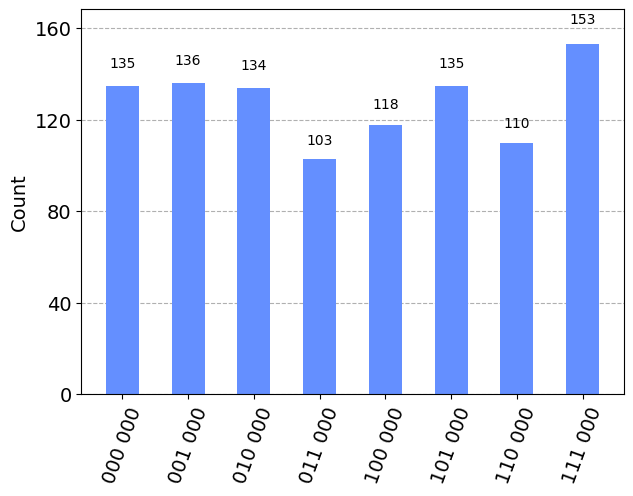

In [17]:
qc.measure_all()

# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

In [20]:
import numpy as np
from qiskit import QuantumCircuit
from scipy.linalg import eigh

# Define number of qubits
n = 3
dim = 2**n  # Dimension of the Hilbert space

# Define the kinetic energy operator K (off-diagonal part of H)
K = np.array([
    [0, -0.75, 0.06, 0.027, 0, 0.027, 0.06, -0.75],
    [-0.75, 0, -0.75, 0.06, 0.027, 0, 0.027, 0.06],
    [0.06, -0.75, 0, -0.75, 0.06, 0.027, 0, 0.027],
    [0.027, 0.06, -0.75, 0, -0.75, 0.06, 0.027, 0],
    [0, 0.027, 0.06, -0.75, 0, -0.75, 0.06, 0.027],
    [0.027, 0, 0.027, 0.06, -0.75, 0, -0.75, 0.06],
    [0.06, 0.027, 0, 0.027, 0.06, -0.75, 0, -0.75],
    [-0.75, 0.06, 0.027, 0, 0.027, 0.06, -0.75, 0]
])

# Define the QFT circuit to generate the QFT matrix
def qft_matrix(n):
    qc = QuantumCircuit(n)
    for qubit in range(n):
        qc.h(qubit)
        for other_qubit in range(qubit + 1, n):
            angle = 2 * np.pi / (2 ** (other_qubit - qubit + 1))
            qc.cp(angle, other_qubit, qubit)
    # Reverse the qubit order by swapping
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

# Generate the QFT matrix
qft_circuit = qft_matrix(n)

# Convert the QFT circuit to a matrix
from qiskit.quantum_info import Operator
F = Operator(qft_circuit).data

# Compute F dagger (Hermitian conjugate of F)
F_dagger = np.conjugate(F.T)

# Transform K into the Fourier basis: K_tilde = F_dagger @ K @ F
K_tilde = F_dagger @ K @ F

# Display results
print("Kinetic Energy Operator (K):")
print(K)
print("\nQFT Matrix (F):")
print(F)
print("\nTransformed Kinetic Energy Operator (K_tilde):")
print(K_tilde)

# Set a threshold for small numerical artifacts
threshold = 1e-15
is_diagonal = np.all(np.abs(K_tilde - np.diag(np.diagonal(K_tilde))) < threshold)

if is_diagonal:
    print("K_tilde is effectively diagonal (within numerical precision).")
else:
    print("K_tilde has significant off-diagonal elements.")


Kinetic Energy Operator (K):
[[ 0.    -0.75   0.06   0.027  0.     0.027  0.06  -0.75 ]
 [-0.75   0.    -0.75   0.06   0.027  0.     0.027  0.06 ]
 [ 0.06  -0.75   0.    -0.75   0.06   0.027  0.     0.027]
 [ 0.027  0.06  -0.75   0.    -0.75   0.06   0.027  0.   ]
 [ 0.     0.027  0.06  -0.75   0.    -0.75   0.06   0.027]
 [ 0.027  0.     0.027  0.06  -0.75   0.    -0.75   0.06 ]
 [ 0.06   0.027  0.     0.027  0.06  -0.75   0.    -0.75 ]
 [-0.75   0.06   0.027  0.     0.027  0.06  -0.75   0.   ]]

QFT Matrix (F):
[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
  -3.53553391e-01+0.j         -3.53553391e-01+0.j
  -3.53553391e-01+0.j         -3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          3.53553391e-01+0.j
  -3.53553391